In [1]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [2]:
print(y_train_full.shape)
X_train_full.shape

(60000,)


(60000, 28, 28)

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential() 
model = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]), 
keras.layers.Dense(300, activation="relu"), 
keras.layers.Dense(100, activation="relu"), 
keras.layers.Dense(10, activation="softmax") ])

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2216 - accuracy: 0.9207 - val_loss: 0.3083 - val_accuracy: 0.8878
Epoch 2/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2183 - accuracy: 0.9216 - val_loss: 0.2965 - val_accuracy: 0.8968
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2152 - accuracy: 0.9220 - val_loss: 0.2975 - val_accuracy: 0.8938
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2121 - accuracy: 0.9242 - val_loss: 0.2932 - val_accuracy: 0.8942
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2083 - accuracy: 0.9258 - val_loss: 0.2993 - val_accuracy: 0.8922
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2037 - accuracy: 0.9267 - val_loss: 0.2973 - val_accuracy: 0.8904
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2017 - accuracy: 0.9274 - val_loss: 0.2929 - val_accuracy:

(0.0, 1.0)

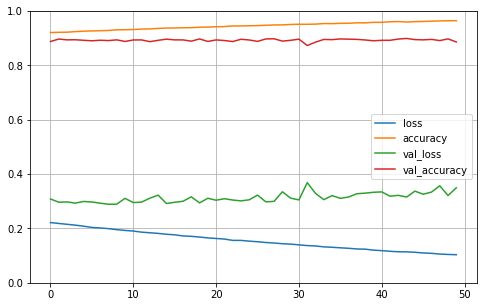

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 81.4717 - accuracy: 0.8522


[81.4716567993164, 0.8521999716758728]

In [22]:
X_new = X_test[:3]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
import numpy as np
X_new = X_test[:3]
y_pred= model.predict(X_new)
print(y_pred) 
y_classes= np.argmax(y_pred,axis=1)
y_classes

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')